<a href="https://colab.research.google.com/github/tnpham23/world-happiness-2022/blob/main/World_Happiness_2022_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Main Questions:

1) What does happiness index look like across the world?

2) What affects happiness index?

3) Can you group countries based on features such as economic production, social support, life expectancy etc?

4) What impact did COVID-19 have on this index?

In [ ]:
#from google.colab import files
#upload = files.upload()

# ^ no longer needed, datasets uploaded directly to google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.linalg as la
import statsmodels.api as sm
from scipy import stats
import itertools
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Prospective Questions:

1) Which factor(s) affect a nation's happiness score the most?

2) Are there any relations between vaccination rates and happiness scores?

3) Do we see any problems with the ratings of each factor?

In [ ]:
# Importing and cleaning dataset

df = pd.read_csv("/content/drive/MyDrive/World Happiness Report 2022.csv")
df.drop(columns = ['Whisker-high', 'Whisker-low'], inplace = True)
df = df.drop(df.index[-1])
df['Country'] = df['Country'].str.replace('*', '')

In [ ]:
df

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...
140,141,Lesotho,3.512,1.312,0.839,0.848,0.000,0.419,0.076,0.018
141,142,Botswana,3.471,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda,3.268,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,0.548,0.947,0.690,0.270,0.329,0.106,0.105


In [ ]:
# Grouping Countries by GDP
gdp = df.sort_values("Explained by: GDP per capita",)
gdp.head(10)

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
107,108,Venezuela,4.925,2.790,0.000,0.968,0.578,0.283,0.225,0.082
103,104,Niger,5.003,2.667,0.570,0.560,0.326,0.571,0.165,0.145
100,101,Mozambique,5.048,2.641,0.578,0.660,0.191,0.593,0.185,0.200
96,97,Liberia,5.122,2.844,0.636,0.670,0.309,0.405,0.178,0.080
137,138,Malawi,3.750,1.661,0.648,0.279,0.388,0.477,0.140,0.157
129,130,Chad,4.251,2.419,0.662,0.506,0.225,0.180,0.182,0.077
127,128,Madagascar,4.339,2.148,0.670,0.645,0.378,0.202,0.143,0.154
139,140,Sierra Leone,3.574,1.556,0.686,0.416,0.273,0.387,0.202,0.055
131,132,Yemen,4.197,1.561,0.691,1.043,0.384,0.330,0.090,0.098
134,135,Togo,4.112,2.061,0.771,0.322,0.360,0.292,0.174,0.132


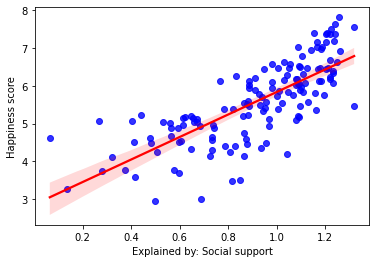

In [ ]:
# Group Country by Social Support
sns.regplot(data=df, x="Explained by: Social support", y="Happiness score",
            scatter_kws = {"color": 'b'}, line_kws = {"color": 'r'})

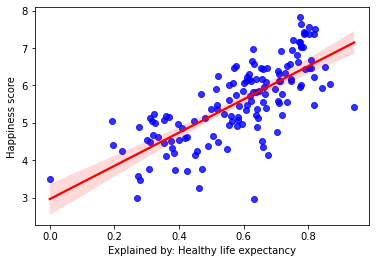

In [ ]:
# Group Country by Life Expectancy
sns.regplot(data=df, x="Explained by: Healthy life expectancy", y="Happiness score",
            scatter_kws = {"color": 'b'}, line_kws = {"color": 'r'})

In [ ]:
# Grouping By Quantiles
x = np.linspace(0,1,5)
a = df['Explained by: GDP per capita'].quantile(x)
b = df['Explained by: Social support'].quantile(x)
c = df['Explained by: Healthy life expectancy'].quantile(x)
d = df['Happiness score'].quantile(x)

a

0.00    0.000
0.25    1.100
0.50    1.452
0.75    1.793
1.00    2.209
Name: Explained by: GDP per capita, dtype: float64

In [ ]:
#GDP (Low To High)

GDP1 = df[df['Explained by: GDP per capita'].between(a[0],a[0.25])]
GDP2 = df[df['Explained by: GDP per capita'].between(a[0.25],a[0.5])]
GDP3 = df[df['Explained by: GDP per capita'].between(a[0.5],a[0.75])]
GDP4 = df[df['Explained by: GDP per capita'].between(a[0.75],a[1])]

In [ ]:
#Social Support (Low To High)

Soc1 = df[df['Explained by: Social support'].between(b[0],b[0.25])]
Soc2 = df[df['Explained by: Social support'].between(b[0.25],b[0.5])]
Soc3 = df[df['Explained by: Social support'].between(b[0.5],b[0.75])]
Soc4 = df[df['Explained by: Social support'].between(b[0.75],b[1])]

In [ ]:
#Life Exptecancy (Low To High)

Lif1 = df[df['Explained by: Healthy life expectancy'].between(c[0],c[0.25])]
Lif2 = df[df['Explained by: Healthy life expectancy'].between(c[0.25],c[0.5])]
Lif3 = df[df['Explained by: Healthy life expectancy'].between(c[0.5],c[0.75])]
Lif4 = df[df['Explained by: Healthy life expectancy'].between(c[0.75],c[1])]

In [ ]:
#Happinese Score (Low To High)

Hap1 = df[df['Happiness score'].between(d[0],d[0.25])]
Hap2 = df[df['Happiness score'].between(d[0.25],d[0.5])]
Hap3 = df[df['Happiness score'].between(d[0.5],d[0.75])]
Hap4 = df[df['Happiness score'].between(d[0.75],d[1])]

In [ ]:
# What affects Happiness Index

# Linear Regression function
def lin_reg(x, y):
    '''
    ordinary linear regression using least-squares

    Parameters
    ----------
    x: regressors (numpy array)
    y: dependent variable (numpy array)

    Returns
    -------
    coefficients: regression coefficients (pandas Series)
    residuals: regression residuals (numpy array)
    r_squared: correlation coefficient (float)

    '''
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    coefficients = model.params
    residuals = model.resid
    r_squared = model.rsquared

    return coefficients, residuals, r_squared

In [ ]:
a = lin_reg(df["Happiness score"].values, df["Explained by: GDP per capita"].values)
b = lin_reg(df["Happiness score"].values, df["Explained by: Social support"].values)
c = lin_reg(df["Happiness score"].values, df["Explained by: Healthy life expectancy"].values)
d = lin_reg(df["Happiness score"].values, df["Explained by: Freedom to make life choices"].values)
e = lin_reg(df["Happiness score"].values, df["Explained by: Generosity"].values)
f = lin_reg(df["Happiness score"].values, df["Explained by: Perceptions of corruption"].values)


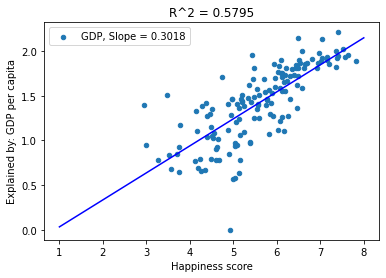

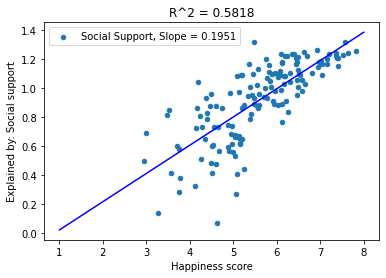

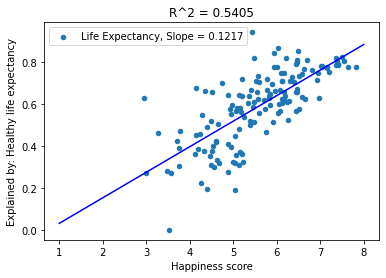

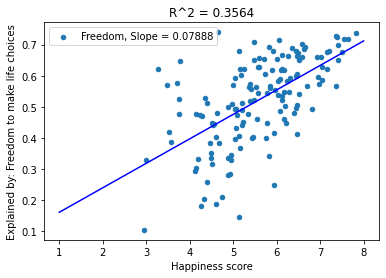

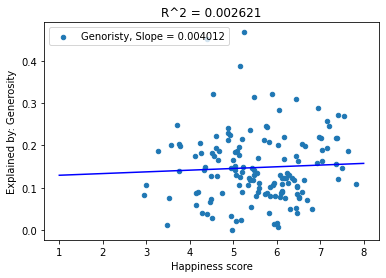

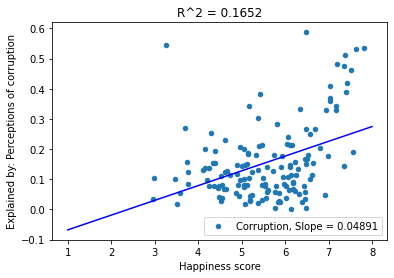

In [ ]:
# Plotting data points and regression line

x = np.linspace(1,8,250)

df.plot.scatter(x="Happiness score",y="Explained by: GDP per capita",label="GDP, Slope = {:.4}".format(a[0][1]))
plt.plot(x,a[0][0]+a[0][1]*x, "b")
plt.title("R^2 = {:.4}".format(a[2]))
plt.show()
df.plot.scatter(x="Happiness score",y="Explained by: Social support",label="Social Support, Slope = {:.4}".format(b[0][1]))
plt.plot(x,b[0][0]+b[0][1]*x, "b")
plt.title("R^2 = {:.4}".format(b[2]))
plt.show()
df.plot.scatter(x="Happiness score",y="Explained by: Healthy life expectancy",label="Life Expectancy, Slope = {:.4}".format(c[0][1]))
plt.plot(x,c[0][0]+c[0][1]*x, "b")
plt.title("R^2 = {:.4}".format(c[2]))
plt.show()
df.plot.scatter(x="Happiness score",y="Explained by: Freedom to make life choices",label="Freedom, Slope = {:.4}".format(d[0][1]))
plt.plot(x,d[0][0]+d[0][1]*x, "b")
plt.title("R^2 = {:.4}".format(d[2]))
plt.show()
df.plot.scatter(x="Happiness score",y="Explained by: Generosity",label="Genoristy, Slope = {:.4}".format(e[0][1]))
plt.plot(x,e[0][0]+e[0][1]*x, "b")
plt.title("R^2 = {:.4}".format(e[2]))
plt.show()
df.plot.scatter(x="Happiness score",y="Explained by: Perceptions of corruption",label="Corruption, Slope = {:.4}".format(f[0][1]))
plt.plot(x,f[0][0]+f[0][1]*x, "b")
plt.title("R^2 = {:.4}".format(f[2]))
plt.show()

# GDP has the most positive slope and a good corelation value

In [ ]:
#Analyzing Pre Covid Data set

Precovid = pd.read_csv('/content/drive/MyDrive/World Happiness Report 2018.csv')
#I used the 2018 Data set, but this data set actually averages out all the previous years
Precovid.rename(columns={'country': 'Country'}, inplace=True)
Precovid = Precovid.groupby(["Country"]).mean()
Precovid.rename(columns={'Life Ladder': 'Happiness score (Pre)'}, inplace=True)
Compare = pd.merge(df, Precovid, on ="Country")
Compare["Happiness score"] - Compare["Happiness score (Pre)"]
Compare.insert(2,'Difference', Compare["Happiness score"] - Compare["Happiness score (Pre)"] )
Compare.describe().head()

,RANK,Difference,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,...,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,133.000000,137.000000,137.000000,140.000000,140.000000,113.000000,125.000000,140.000000
mean,72.578571,0.132331,5.583314,1.825571,1.420271,0.916579,0.592993,0.523643,0.146421,0.157936,...,0.712732,0.261322,0.495976,-0.068621,0.045461,2.002204,0.385404,0.375557,0.387172,0.449234
std,42.150308,0.553965,1.064538,0.534138,0.420238,0.269126,0.172636,0.139207,0.081164,0.128757,...,0.096652,0.069593,0.178312,0.843879,0.976893,0.297924,0.099735,0.079516,0.086171,0.095222
min,1.000000,-2.090853,2.955000,0.187000,0.000000,0.064000,0.000000,0.103000,0.000000,0.000000,...,0.506424,0.123623,0.164084,-1.888195,-1.697261,1.282508,0.176520,0.252143,0.228833,0.262646
25%,36.750000,-0.184960,4.890250,1.555750,1.103750,0.732000,0.477000,0.447000,0.088750,0.070500,...,0.638658,0.209618,0.371353,-0.726596,-0.700026,1.793919,0.324278,0.318000,0.321000,0.376021


Text(0.07, -2.0, 'Mean: 0.12')

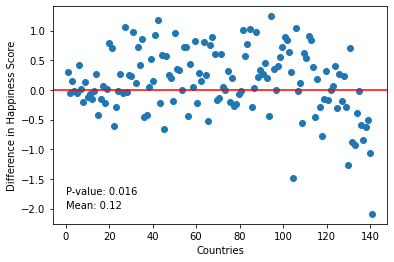

In [ ]:
corre_coef, p_value = stats.pearsonr(np.linspace(1,141,140), Compare["Difference"])
plt.scatter(np.linspace(1,141,140), Compare["Difference"]) #X axis are the ranks of countries
plt.axhline(0, color='red')
plt.xlabel("Countries")
plt.ylabel("Difference in Happiness Score")
plt.text(0.07, -1.75, "P-value: {:.2}".format(p_value))
plt.text(0.07, -2.0, "Mean: {:.2}".format(0.120))
#mean difference in happiness increased by 0.12. Either covid made people happier or no difference

In [ ]:
# Importing and Cleaning COVID dataset

covid =  pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
covid.drop(columns = ['excess_mortality_cumulative_absolute', 'excess_mortality_cumulative', \
                      'excess_mortality', 'excess_mortality_cumulative_per_million', \
                      'total_cases', 'new_cases',
                      'new_cases_smoothed', 'total_deaths', 'new_deaths',
                      'new_deaths_smoothed', 'total_cases_per_million',
                      'new_cases_per_million', 'new_cases_smoothed_per_million',
                      'total_deaths_per_million', 'new_deaths_per_million',
                      'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
                      'icu_patients_per_million', 'hosp_patients',
                      'hosp_patients_per_million', 'weekly_icu_admissions',
                      'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
                      'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
                      'total_tests_per_thousand', 'new_tests_per_thousand',
                      'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
                      'positive_rate', 'tests_per_case', 'tests_units',
                      'stringency_index', 'total_boosters_per_hundred',
                      'new_vaccinations_smoothed_per_million',
                      'new_people_vaccinated_smoothed',
                      'population', 'population_density', 'median_age', 'aged_65_older',
                      'aged_70_older', 'extreme_poverty',
                      'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
                      'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
                      'human_development_index', 'iso_code'], inplace = True)

covid.columns

Index(['continent', 'location', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'new_people_vaccinated_smoothed_per_hundred', 'gdp_per_capita',
       'life_expectancy'],
      dtype='object')

In [ ]:
covid.dropna(axis = 0, inplace = True)
covid

,continent,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_people_vaccinated_smoothed_per_hundred,gdp_per_capita,life_expectancy
2390,Europe,Albania,2021-11-07,1947148.0,1032457.0,905876.0,8815.0,2472.0,5709.0,68.21,36.17,31.73,0.079,11803.431,78.57
2393,Europe,Albania,2021-11-10,1971973.0,1040015.0,913524.0,18434.0,8614.0,6481.0,69.08,36.43,32.00,0.074,11803.431,78.57
2394,Europe,Albania,2021-11-11,1980231.0,1042227.0,916432.0,21572.0,8258.0,6800.0,69.37,36.51,32.10,0.075,11803.431,78.57
2400,Europe,Albania,2021-11-17,2025561.0,1053553.0,933630.0,38378.0,8607.0,7655.0,70.96,36.91,32.70,0.068,11803.431,78.57
2401,Europe,Albania,2021-11-18,2033766.0,1055690.0,936539.0,41537.0,8205.0,7648.0,71.24,36.98,32.81,0.067,11803.431,78.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202860,Africa,Zimbabwe,2022-07-02,11984914.0,6310089.0,4614738.0,1060087.0,10601.0,6190.0,74.94,39.45,28.85,0.013,1899.775,61.49
202861,Africa,Zimbabwe,2022-07-03,12006503.0,6317360.0,4621086.0,1068057.0,21589.0,8710.0,75.07,39.50,28.89,0.019,1899.775,61.49
202862,Africa,Zimbabwe,2022-07-04,12023341.0,6323289.0,4629963.0,1070089.0,16838.0,10797.0,75.18,39.54,28.95,0.024,1899.775,61.49
202863,Africa,Zimbabwe,2022-07-05,12025740.0,6324174.0,4630484.0,1071082.0,2399.0,10821.0,75.19,39.54,28.95,0.024,1899.775,61.49


In [ ]:
# Merge world happiness and covid datasets together

data = df.merge(covid, left_on='Country', right_on='location')
data = data[~(data == 0).any(axis=1)] #Drop rows with value 0
data.head()

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,...,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_people_vaccinated_smoothed_per_hundred,gdp_per_capita,life_expectancy
0,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,...,4095316.0,2030748.0,64728.0,26015.0,188.00,77.34,73.98,0.008,40585.721,81.91
1,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,...,4098210.0,2080752.0,54489.0,32017.0,188.98,77.37,74.03,0.012,40585.721,81.91
2,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,...,4121455.0,2332576.0,53428.0,48479.0,194.13,77.54,74.45,0.029,40585.721,81.91
3,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,...,4124164.0,2366406.0,37696.0,46080.0,194.81,77.56,74.50,0.028,40585.721,81.91
4,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,...,4126922.0,2401482.0,38983.0,45037.0,195.51,77.58,74.55,0.027,40585.721,81.91


In [ ]:
data.columns


Index(['RANK', 'Country', 'Happiness score', 'Dystopia (1.83) + residual',
       'Explained by: GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'continent', 'location', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'new_people_vaccinated_smoothed_per_hundred', 'gdp_per_capita',
       'life_expectancy'],
      dtype='object')

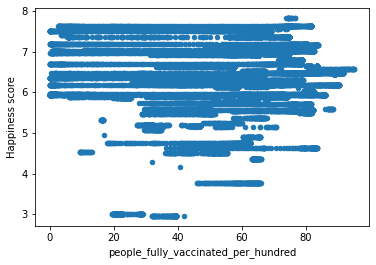

In [ ]:
#Graphing people vaccinated per hundred and Happiness have no good results since total boosters has too great a range
data.plot.scatter(x="people_fully_vaccinated_per_hundred", y="Happiness score")

In [ ]:
#This is for Q1, finding Happiness score dist across the world
continent = data.groupby("continent", as_index=False)[["Happiness score"]].mean()
continent.sort_values("Happiness score")
#Oceania is happiest, africa is least happiest

,continent,Happiness score
0,Africa,4.191449
1,Asia,5.628244
5,South America,5.989079
3,North America,6.609942
2,Europe,6.704762
4,Oceania,7.186472


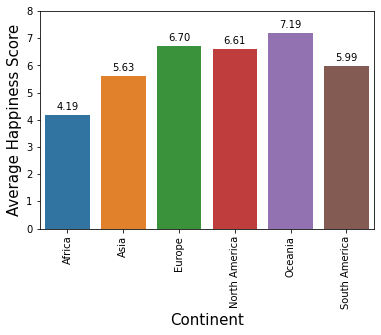

In [ ]:
world = sns.barplot(x = "continent", y="Happiness score", data=continent)
plt.setp(world.get_xticklabels(), rotation=90)
world.set_ylabel("Average Happiness Score", fontsize=15)
world.set_xlabel("Continent", fontsize=15)
plt.ylim(0,8)
#display y-values
for bar in world.patches:
    world.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

In [ ]:
#Effect of Total Vaccinations per hundred on Happiness
x = np.linspace(0,1,11)
a = data['people_fully_vaccinated_per_hundred'].quantile(x)
Vac1 = data[data['people_fully_vaccinated_per_hundred'].between(a[0],a[0.1])]
Vac2 = data[data['people_fully_vaccinated_per_hundred'].between(a[0.1],a[0.2])]
Vac3 = data[data['people_fully_vaccinated_per_hundred'].between(a[0.2],58.507)]
Vac4 = data[data['people_fully_vaccinated_per_hundred'].between(58.507,a[0.4])]
Vac5 = data[data['people_fully_vaccinated_per_hundred'].between(a[0.4],a[0.5])]
Vac6 = data[data['people_fully_vaccinated_per_hundred'].between(a[0.5],72.190)]
Vac7 = data[data['people_fully_vaccinated_per_hundred'].between(72.190,75.880)]
Vac8 = data[data['people_fully_vaccinated_per_hundred'].between(75.880,a[0.8])]
Vac9 = data[data['people_fully_vaccinated_per_hundred'].between(a[0.8],a[0.9])]
Vac10 = data[data['people_fully_vaccinated_per_hundred'].between(a[0.9],a[1])]


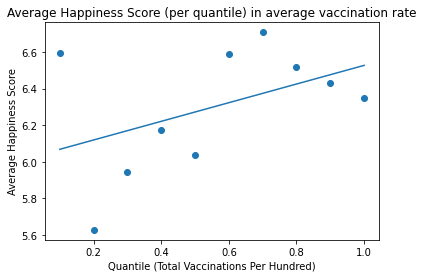

In [ ]:
plt.scatter(np.linspace(0.1,1,10),  [Vac1["Happiness score"].mean(), Vac2["Happiness score"].mean(),Vac3["Happiness score"].mean(),Vac4["Happiness score"].mean(),Vac5["Happiness score"].mean(),Vac6["Happiness score"].mean(),Vac7["Happiness score"].mean(),Vac8["Happiness score"].mean(),Vac9["Happiness score"].mean(),Vac10["Happiness score"].mean()])
o = lin_reg(np.linspace(0.1,1,10), [Vac1["Happiness score"].mean(), Vac2["Happiness score"].mean(),Vac3["Happiness score"].mean(),Vac4["Happiness score"].mean(),Vac5["Happiness score"].mean(),Vac6["Happiness score"].mean(),Vac7["Happiness score"].mean(),Vac8["Happiness score"].mean(),Vac9["Happiness score"].mean(),Vac10["Happiness score"].mean()])
plt.plot(np.linspace(0.1,1,100),o[0][0]+o[0][1]*np.linspace(0.1,1,100), label=" Slope = {:.4}".format(o[0][1]))
plt.title('Average Happiness Score (per quantile) in average vaccination rate')
plt.xlabel('Quantile (Total Vaccinations Per Hundred)')
plt.ylabel('Average Happiness Score')
plt.show()

#Slightly positive

In [ ]:
o[0][1] # slope of regression line

0.509863352174821

In [ ]:
# Pearson correlation between happiness score and total fully-vaccinated per hundred

y = [Vac1["Happiness score"].mean(), Vac2["Happiness score"].mean(), Vac3["Happiness score"].mean(),
     Vac4["Happiness score"].mean(), Vac5["Happiness score"].mean(), Vac6["Happiness score"].mean(),
     Vac7["Happiness score"].mean(), Vac8["Happiness score"].mean(), Vac9["Happiness score"].mean(),
     Vac10["Happiness score"].mean()]
x = np.linspace(0,1,10)

corre_coef, p_value = stats.pearsonr(x, y)
intercept = stats.linregress(x, y)[1]
corre_coef, p_value, intercept


(0.4485154180967806, 0.1935606700151388, 6.067579970160547)

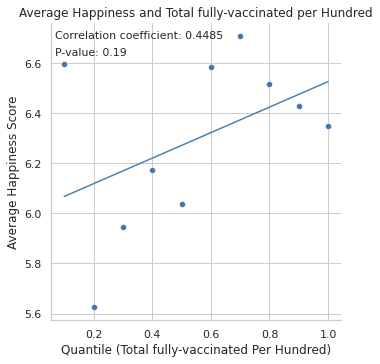

In [ ]:
# Graph average happiness scores, total full_vac per hundred, correlation coefficient, and p-value

sns.set(style='whitegrid')
sns.relplot(np.linspace(0.1,1,10), y)
plt.plot(np.linspace(0.1,1,100), o[0][0]+o[0][1]*np.linspace(0.1,1,100), color='steelblue')
plt.title('Average Happiness and Total fully-vaccinated per Hundred')
plt.xlabel('Quantile (Total fully-vaccinated Per Hundred)')
plt.ylabel('Average Happiness Score')
plt.text(0.07, 6.7, "Correlation coefficient: {:.4}".format(corre_coef), size=11)
plt.text(0.07, 6.63, "P-value: {:.2}".format(p_value), size=11)
plt.show()


In [ ]:
data.head()

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,...,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_people_vaccinated_smoothed_per_hundred,gdp_per_capita,life_expectancy
0,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,...,4095316.0,2030748.0,64728.0,26015.0,188.00,77.34,73.98,0.008,40585.721,81.91
1,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,...,4098210.0,2080752.0,54489.0,32017.0,188.98,77.37,74.03,0.012,40585.721,81.91
2,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,...,4121455.0,2332576.0,53428.0,48479.0,194.13,77.54,74.45,0.029,40585.721,81.91
3,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,...,4124164.0,2366406.0,37696.0,46080.0,194.81,77.56,74.50,0.028,40585.721,81.91
4,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,...,4126922.0,2401482.0,38983.0,45037.0,195.51,77.58,74.55,0.027,40585.721,81.91


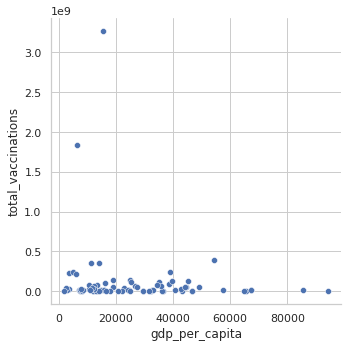

In [ ]:
# More cleaning and checking correlations between variables
countries = data.groupby(['Country']).mean()
sns.relplot(x='gdp_per_capita', y='total_vaccinations', data=countries)
countries[['gdp_per_capita', 'total_vaccinations']]
heatmap_data = data.drop(columns=['new_vaccinations_smoothed', 'people_fully_vaccinated',
       'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'new_people_vaccinated_smoothed_per_hundred', 'RANK', 'people_vaccinated'])
corr = countries.corr(method='pearson')


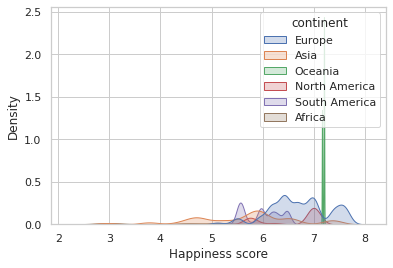

In [ ]:
sns.kdeplot(data['Happiness score'], hue=data['continent'], fill=True)

Text(0.5, 1.0, 'Factor Correlation 2022')

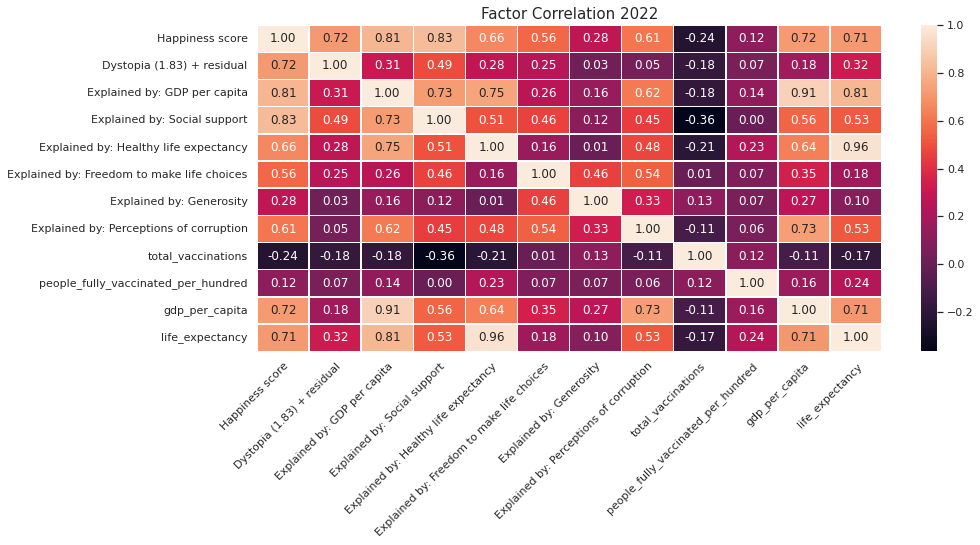

In [ ]:
# Factors correlation heatmap

plt.figure(figsize = (14, 6))
ax = sns.heatmap(heatmap_data.corr(), annot = True, fmt = '.2f', linewidth = 0.5)
props = plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', rotation_mode='anchor')
plt.title('Factor Correlation 2022', size = 15)

In [ ]:
# Cleaning World Happiness dataset for stacked horizontal bar graph
stacked = df
stacked = df.iloc[0:len(df):3]
stacked.sort_values(by='Happiness score', ascending=False).head()

,RANK,Country,Happiness score,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534
3,4,Switzerland,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461
6,7,Sweden,7.384,2.003,1.920,1.204,0.803,0.724,0.218,0.512
9,10,New Zealand,7.200,1.954,1.852,1.235,0.752,0.680,0.245,0.483
12,13,Ireland,7.041,1.743,2.129,1.166,0.779,0.627,0.190,0.408


Text(0, 0.5, 'Countries')

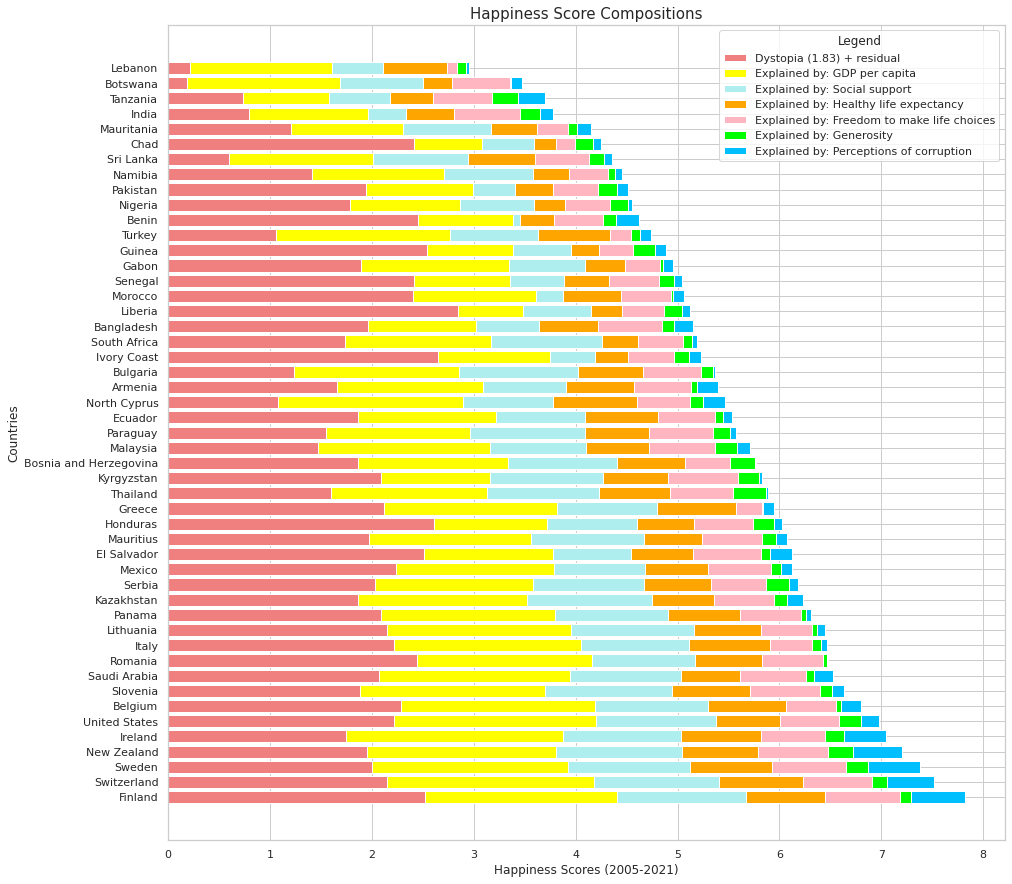

In [ ]:
# Graphing horizontal bar chart

from itertools import cycle
colors = cycle(['lightcoral', 'yellow', 'paleturquoise', 'orange', 'lightpink', 'lime', 'deepskyblue'])

v1 = stacked['Dystopia (1.83) + residual']
v2 = stacked['Explained by: GDP per capita']
v3 = stacked['Explained by: Social support']
v4 = stacked['Explained by: Healthy life expectancy']
v5 = stacked['Explained by: Freedom to make life choices']
v6 = stacked['Explained by: Generosity']
v7 = stacked['Explained by: Perceptions of corruption']

plt.figure(figsize = (15, 15))
ax1 = plt.barh(stacked['Country'], v1, color=next(colors))
ax2 = plt.barh(stacked['Country'], v2, left=v1, color=next(colors))
ax3 = plt.barh(stacked['Country'], v3, left=v1+v2, color=next(colors))
ax4 = plt.barh(stacked['Country'], v4, left=v1+v2+v3, color=next(colors))
ax5 = plt.barh(stacked['Country'], v5, left=v1+v2+v3+v4, color=next(colors))
ax6 = plt.barh(stacked['Country'], v6, left=v1+v2+v3+v4+v5, color=next(colors))
ax7 = plt.barh(stacked['Country'], v7, left=v1+v2+v3+v4+v5+v6, color=next(colors))
plt.legend([ax1, ax2, ax3, ax4, ax5, ax6, ax7], ["Dystopia (1.83) + residual", 'Explained by: GDP per capita', 'Explained by: Social support',
                                                 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices',
                                                 'Explained by: Generosity', 'Explained by: Perceptions of corruption'], title="Legend", loc="upper right");
plt.title("Happiness Score Compositions", size=15)
plt.xlabel("Happiness Scores (2005-2021)", size=12)
plt.ylabel("Countries", size=12)


# Incomplete for-loop version

# for col in df.columns[3:10]:
#   plt.barh(stacked['Country'], stacked[col], color=next(colors), bottom=True)


Cell below: Unused code archive

In [ ]:
# Vac1['Happiness score normalized'] = (Vac1['Happiness score']-Vac1['Happiness score'].min()) / (Vac1['Happiness score'].max()-Vac1['Happiness score'].min())
# Vac2['Happiness score normalized'] = (Vac2['Happiness score']-Vac2['Happiness score'].min()) / (Vac2['Happiness score'].max()-Vac2['Happiness score'].min())
# Vac3['Happiness score normalized'] = (Vac3['Happiness score']-Vac3['Happiness score'].min()) / (Vac3['Happiness score'].max()-Vac3['Happiness score'].min())
# Vac4['Happiness score normalized'] = (Vac4['Happiness score']-Vac4['Happiness score'].min()) / (Vac4['Happiness score'].max()-Vac4['Happiness score'].min())
# Vac5['Happiness score normalized'] = (Vac5['Happiness score']-Vac5['Happiness score'].min()) / (Vac5['Happiness score'].max()-Vac5['Happiness score'].min())
# Vac6['Happiness score normalized'] = (Vac6['Happiness score']-Vac6['Happiness score'].min()) / (Vac6['Happiness score'].max()-Vac6['Happiness score'].min())
# Vac7['Happiness score normalized'] = (Vac7['Happiness score']-Vac7['Happiness score'].min()) / (Vac7['Happiness score'].max()-Vac7['Happiness score'].min())
# Vac8['Happiness score normalized'] = (Vac8['Happiness score']-Vac8['Happiness score'].min()) / (Vac8['Happiness score'].max()-Vac8['Happiness score'].min())
# Vac9['Happiness score normalized'] = (Vac9['Happiness score']-Vac9['Happiness score'].min()) / (Vac9['Happiness score'].max()-Vac9['Happiness score'].min())
# Vac10['Happiness score normalized'] = (Vac10['Happiness score']-Vac10['Happiness score'].min()) / (Vac10['Happiness score'].max()-Vac10['Happiness score'].min())

# y = [Vac1['Happiness score normalized'].mean(), Vac2['Happiness score normalized'].mean(), Vac3['Happiness score normalized'].mean(),
#      Vac4['Happiness score normalized'].mean(), Vac5['Happiness score normalized'].mean(), Vac6['Happiness score normalized'].mean(),
#      Vac7['Happiness score normalized'].mean(), Vac8['Happiness score normalized'].mean(), Vac9['Happiness score normalized'].mean(),
#      Vac10['Happiness score normalized'].mean()]
# x = np.linspace(0.1,1,10)
# x = [Vac1['total_vaccinations_per_hundred'].mean(), Vac2['total_vaccinations_per_hundred'].mean(), Vac3['total_vaccinations_per_hundred'].mean(),
#      Vac4['total_vaccinations_per_hundred'].mean(), Vac5['total_vaccinations_per_hundred'].mean(), Vac6['total_vaccinations_per_hundred'].mean(),
#      Vac7['total_vaccinations_per_hundred'].mean(), Vac8['total_vaccinations_per_hundred'].mean(), Vac9['total_vaccinations_per_hundred'].mean(),
#      Vac10['total_vaccinations_per_hundred'].mean()]
# x = np.linspace(0,1,10)
# slope, intercept = stats.linregress(x,y)[0:2]
# print(x)
# print(y)
# slope

# data['total_vac_normalized'] = data['total_vaccinations'] / data['total_vaccinations'].max()
# data['Happiness score normalized'] = data['Happiness score'] / data['Happiness score'].max()

# sns.lineplot(x=x, y=np.linspace(0.1,1,10)*coef+intercept);

In [ ]:
# https://github.com/owid/covid-19-data/blob/master/public/data/README.md